# Diabetes Classification - KNN

In [67]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
#Load dataset
dataset=pd.read_csv(r'C:\Users\Lenovo\Desktop\Arun DS\Task 12 to 17\TASK - 17\pima-indians-diabetes-database\diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
dataset.shape

(768, 9)

# Exploratory and Statistical Analysis

In [12]:
## Gives information about the data types,columns, null value counts, memory usage etc
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


DataFrame.describe() method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset.

In [15]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Here in the above code T is Transpose index and columns.

Reflect the DataFrame over its main diagonal by writing rows as columns and vice-versa. The property T is an accessor to the method transpose().

In [20]:
dataset_copy=dataset.copy()
dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

#Showing the count of NaN Values
print(dataset_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


To fill these Nan Values the data distribution needs to be understood

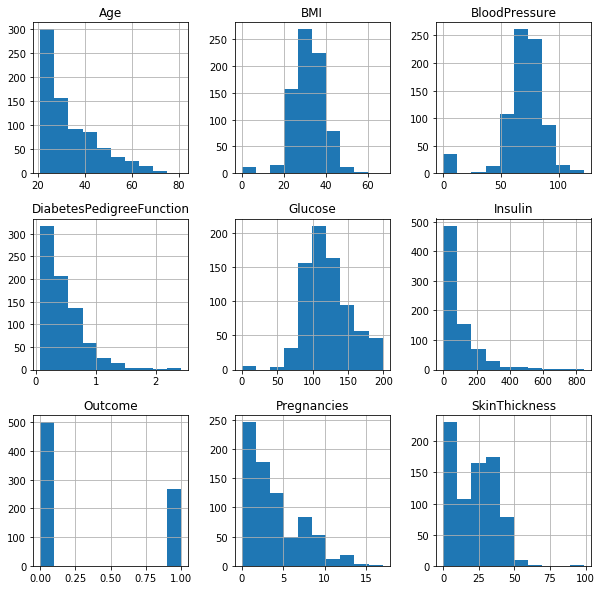

In [26]:
plt=dataset.hist(figsize=(10,10))


Imputing NaN values for the columns according to their distribution

In [27]:
dataset_copy['Glucose'].fillna(dataset_copy['Glucose'].mean(),inplace=True)
dataset_copy['BloodPressure'].fillna(dataset_copy['BloodPressure'].mean(),inplace=True)
dataset_copy['SkinThickness'].fillna(dataset_copy['SkinThickness'].median(),inplace=True)
dataset_copy['Insulin'].fillna(dataset_copy['Insulin'].median(),inplace=True)
dataset_copy['BMI'].fillna(dataset_copy['BMI'].mean(),inplace=True)


Plotting after NaN removal

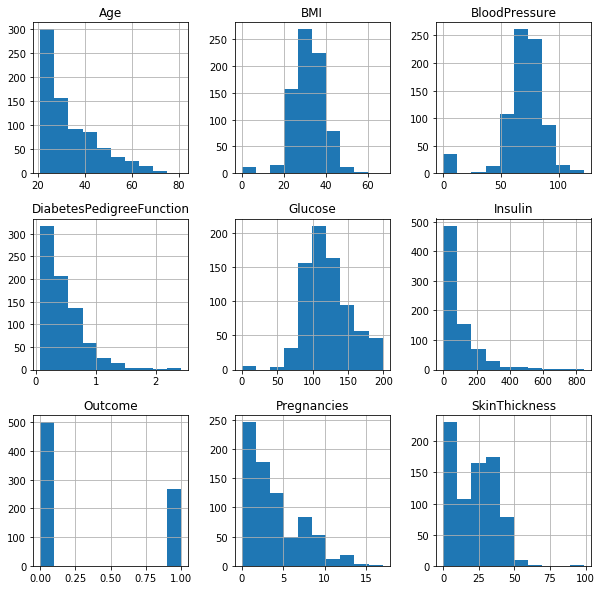

In [28]:
plt=dataset.hist(figsize=(10,10))

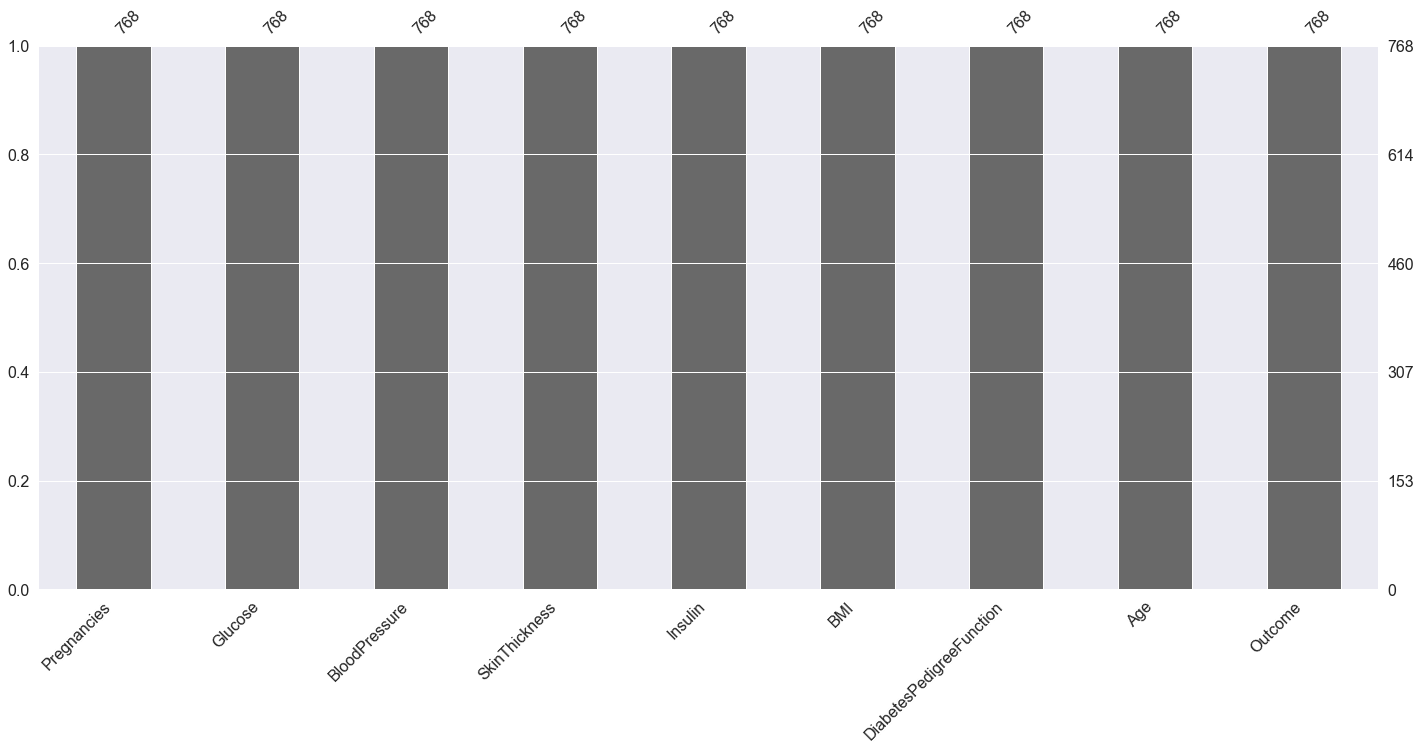

In [51]:
#Null Count Analysis
import missingno as msno
p=msno.bar(dataset)

0    500
1    268
Name: Outcome, dtype: int64


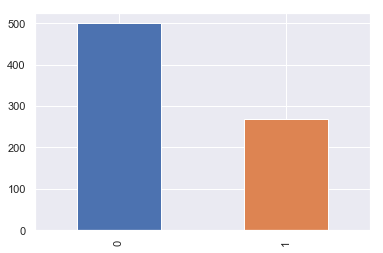

In [53]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel={1:"#0392cf",2:"#7bc043"}
colors=dataset['Outcome'].map(lambda x:color_wheel.get(x+1))
print(dataset.Outcome.value_counts())
p=dataset.Outcome.value_counts().plot(kind='bar')

The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients


Scatter matrix of uncleaned data

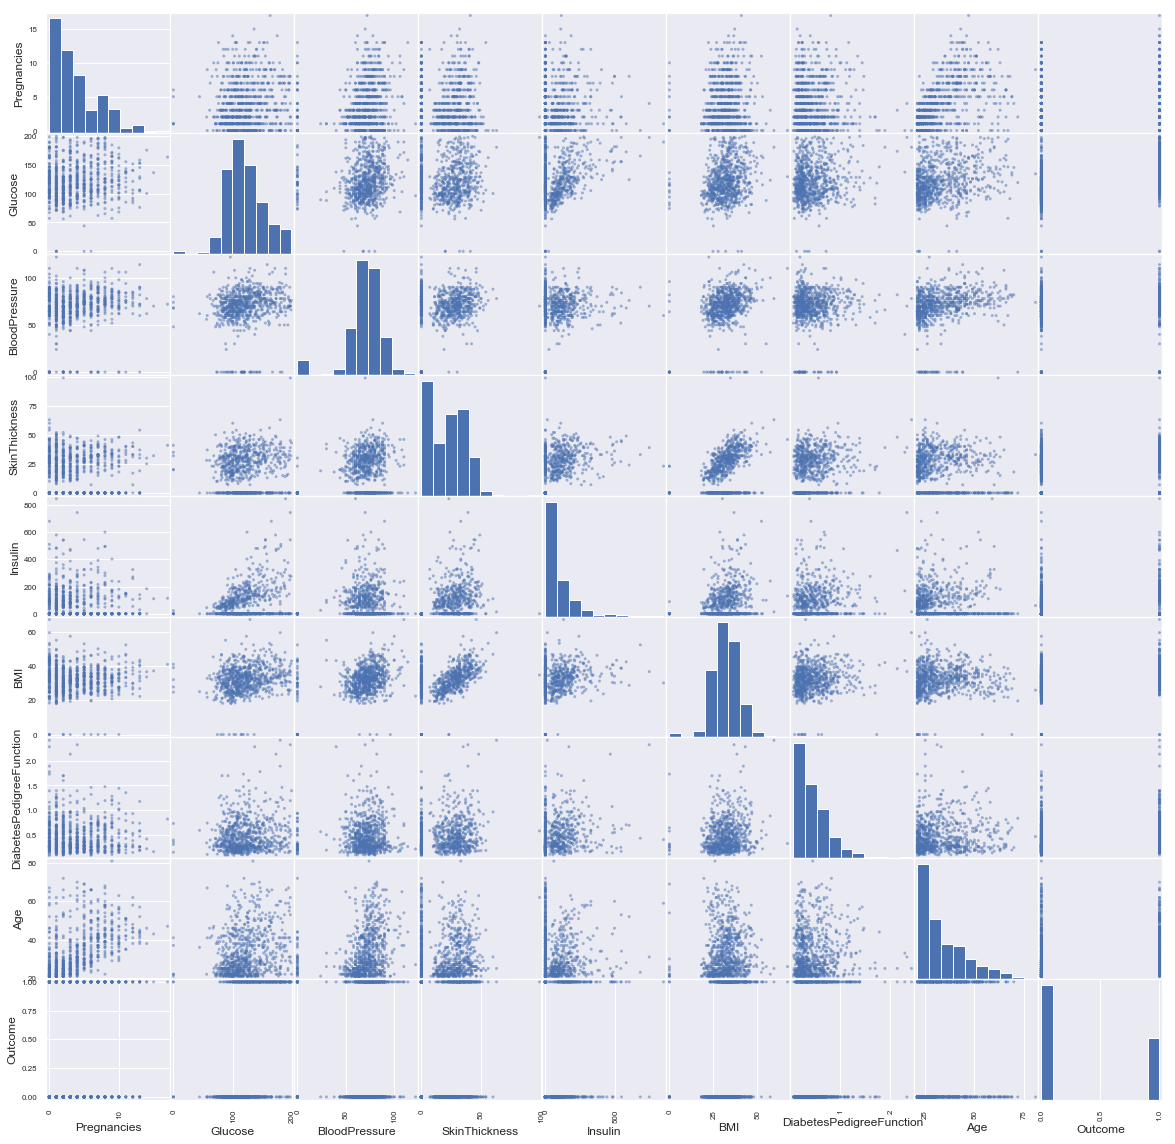

In [68]:
from pandas.tools.plotting import scatter_matrix
p=scatter_matrix(dataset,figsize=(20,20))

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables

Pair plot for cleaned data

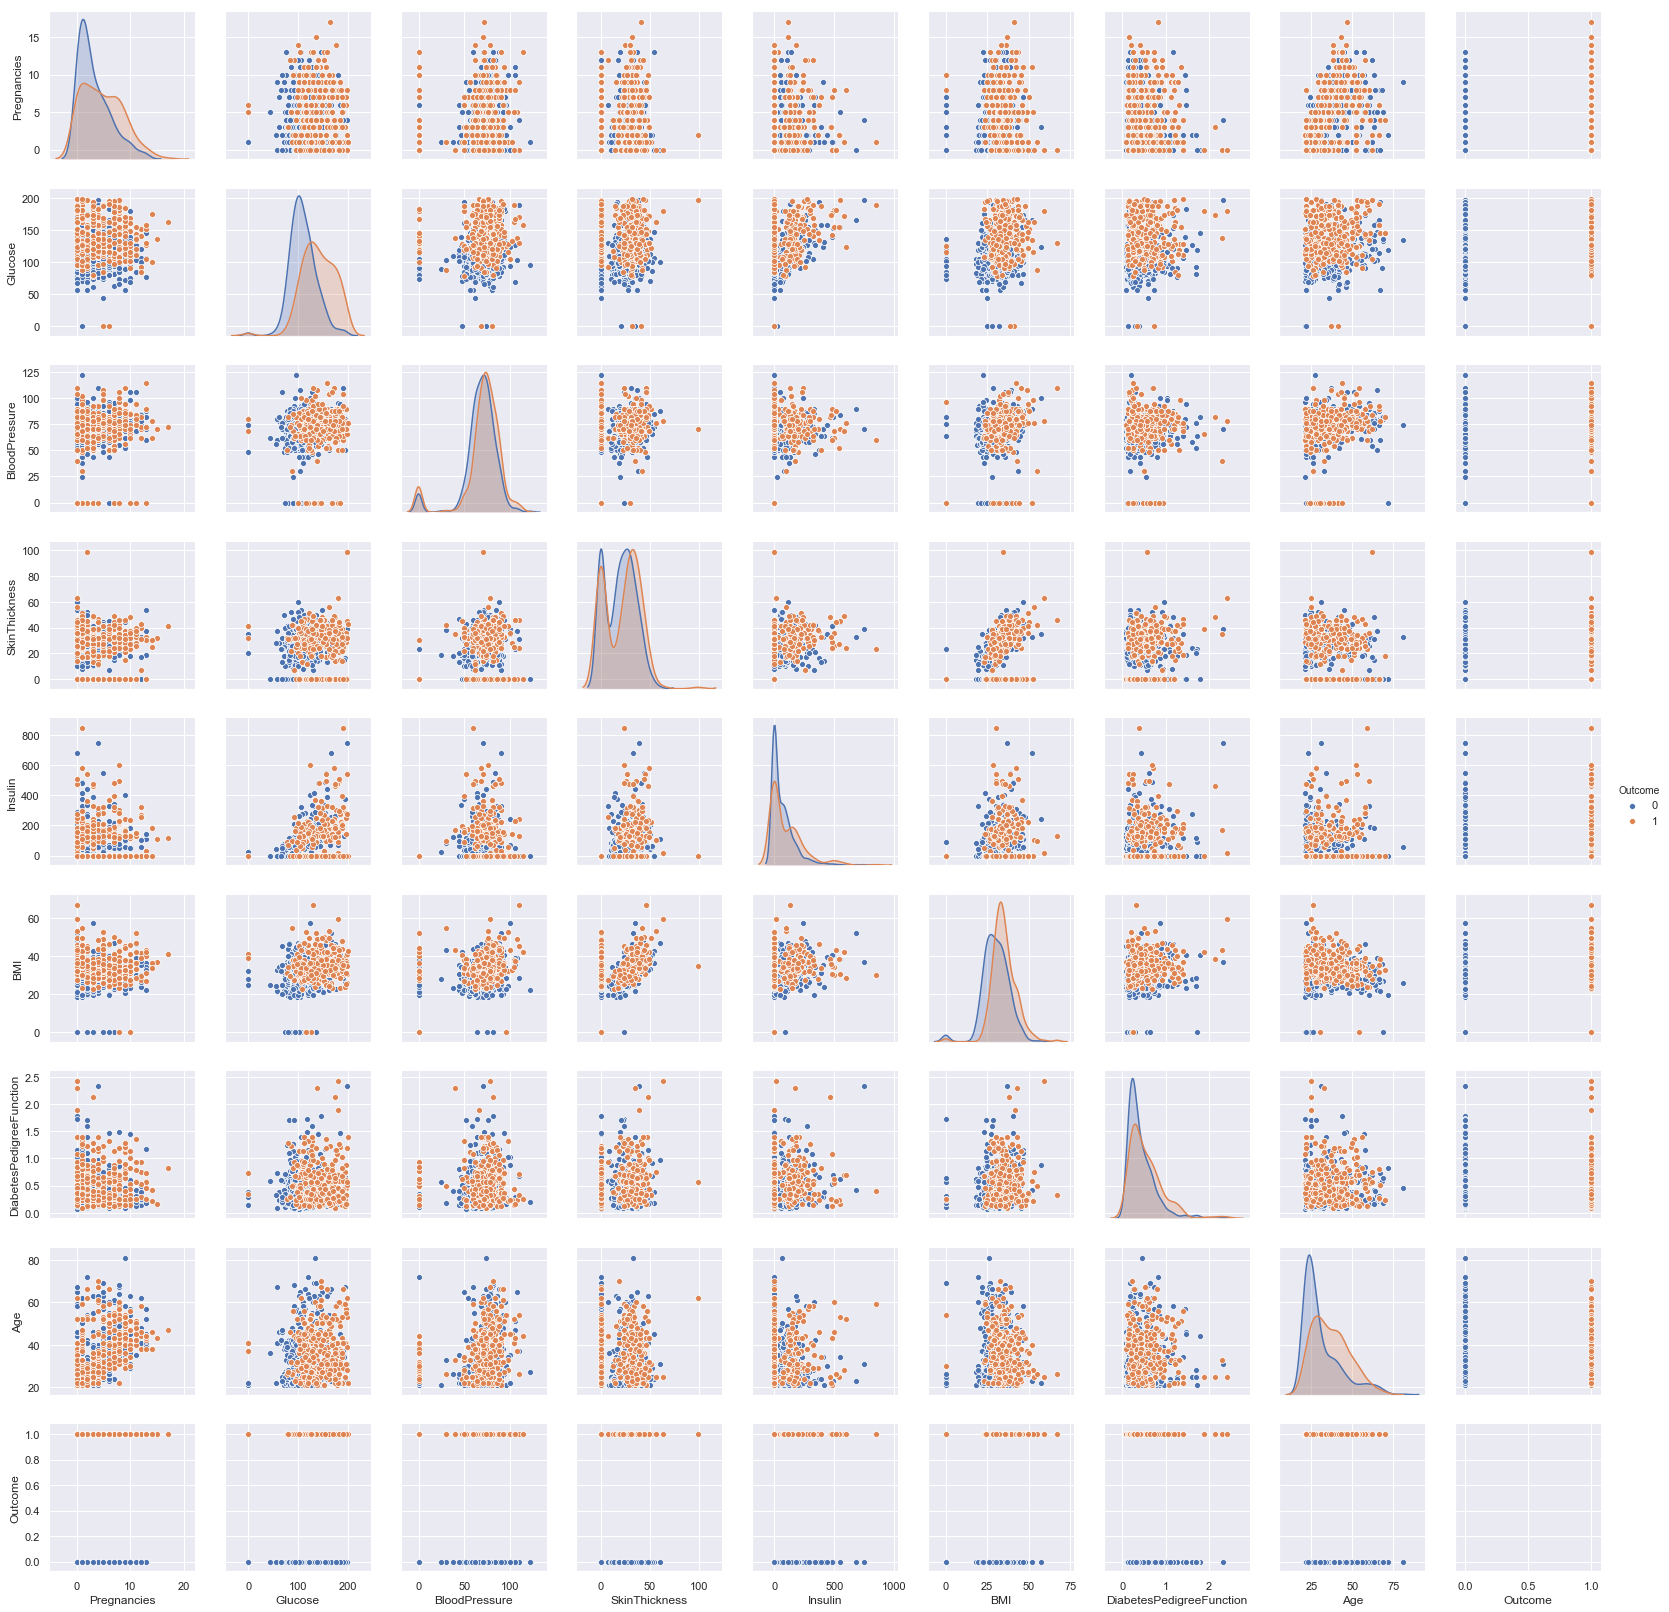

In [66]:
p=sns.pairplot(dataset,hue='Outcome')

Pearson's Correlation Coefficient: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

Heatmap for uncleaned data

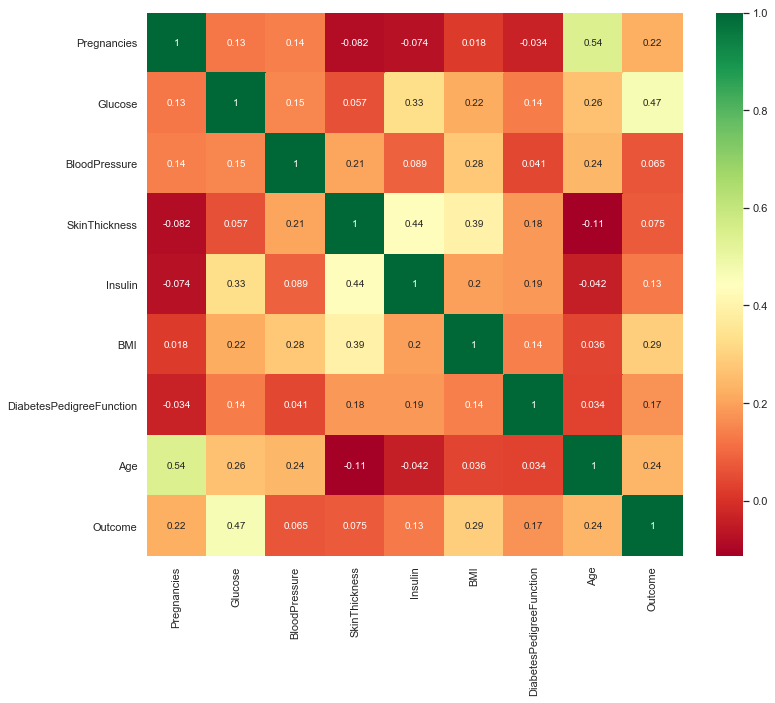

In [70]:
plt.figure(figsize=(12,10)) # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn') # seaborn has very simple solution for heatmap

Heatmap for cleaned data

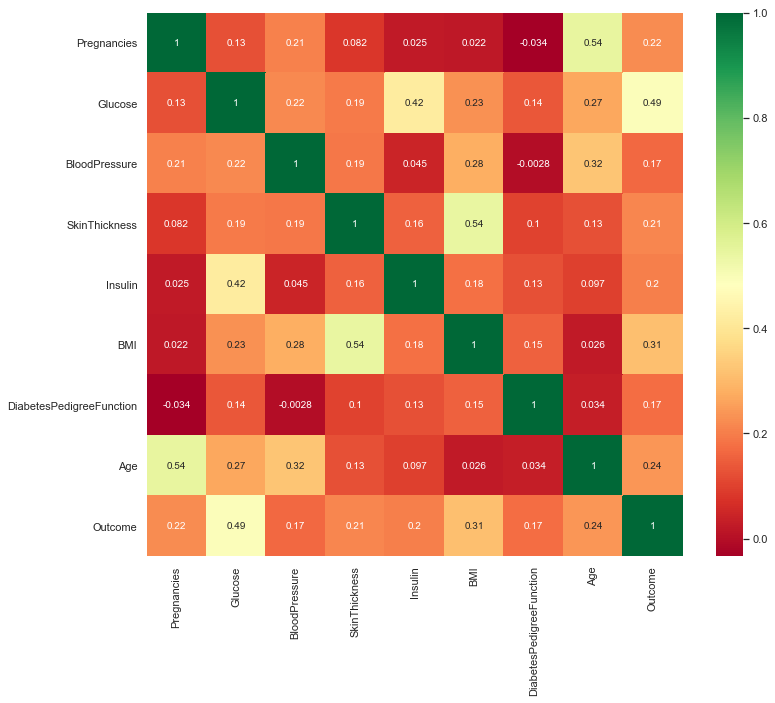

In [74]:
plt.figure(figsize=(12,10))
p=sns.heatmap(dataset_copy.corr(),annot=True,cmap='RdYlGn')

Scaling the data

In [81]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=pd.DataFrame(sc.fit_transform(dataset_copy.drop(['Outcome'],axis=1),),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [82]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.548980,5.484909,-0.020496


In [83]:
y=dataset_copy.Outcome

Test Train Split and Cross Validation methods

In [117]:
#import train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=42,stratify=y)

KNN Classifier

In [118]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

In [119]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(accuracy_score(y_pred,y_test))

0.73046875


In [120]:
from sklearn.neighbors import KNeighborsClassifier

train_scores=[]
test_scores=[]

for i in range(1,15):
    knn=KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [121]:
## score that comes from testing on the same datapoints that were used for training
max_train_score=max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [122]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.5625 % and k = [11]


# Visualization

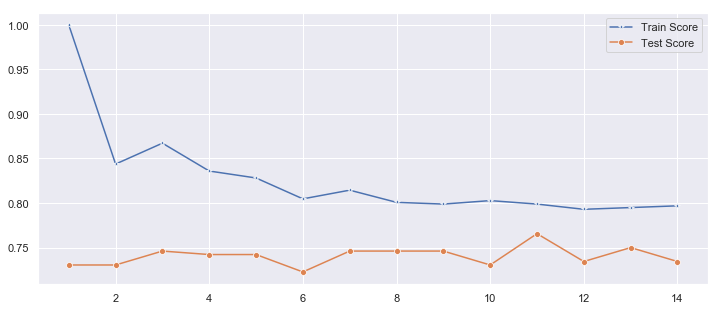

In [123]:
plt.figure(figsize=(12,5))
p=sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p=sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

The best result is captured at k = 11 hence 11 is used for the final model


In [124]:
knn=KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

Model Performance Analysis

In [125]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(X_test)
confusion_matrix(y_pred,y_test)
pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,142,25,167
1,35,54,89
All,177,79,256


Text(30.5, 0.5, 'Actual Label')

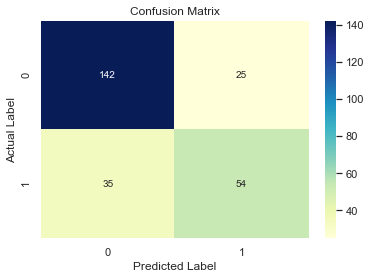

In [126]:
y_pred=knn.predict(X_test)
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
p=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu',fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

Report which includes Precision, Recall and F1-Score

In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83       177
           1       0.61      0.68      0.64        79

   micro avg       0.77      0.77      0.77       256
   macro avg       0.73      0.74      0.73       256
weighted avg       0.78      0.77      0.77       256

